# 1. Análisis del Caso

# 2. Preprocesamiento y Análisis Exploratorio de Datos (EDA)

## 2.1. Configuración e Importación de Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('default')

## 2.2. Carga de Datos

In [ ]:
train = pd.read_csv('train.csv', parse_dates=['Date'], dayfirst=True)
store = pd.read_csv('store.csv')
test = pd.read_csv('test.csv', parse_dates=['Date'], dayfirst=True)
sample_submission = pd.read_csv('sample_submission.csv')

print("Primeras filas de train.csv:")
display(train.head())

print("Primeras filas de store.csv:")
display(store.head())

print("Primeras filas de test.csv:")
display(test.head())

print("Primeras filas de sample_submission.csv:")
display(sample_submission.head())

<ipython-input-103-883c28b1477c>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv', parse_dates=['Date'], dayfirst=True)
<ipython-input-103-883c28b1477c>:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  train = pd.read_csv('train.csv', parse_dates=['Date'], dayfirst=True)


Primeras filas de train.csv:


<ipython-input-103-883c28b1477c>:3: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  test = pd.read_csv('test.csv', parse_dates=['Date'], dayfirst=True)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Primeras filas de store.csv:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Primeras filas de test.csv:


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


Primeras filas de sample_submission.csv:


,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## 2.3. Inspección General y Análisis de Valores Nulos

In [ ]:
print("Información general de train.csv:")
train.info()
print("\nValores nulos en train.csv:")
display(train.isnull().sum())

# Información general y chequeo de valores nulos en store.csv
print("\nInformación general de store.csv:")
store.info()
print("\nValores nulos en store.csv:")
display(store.isnull().sum())

# Información general y chequeo de valores nulos en test.csv
print("\nInformación general de test.csv:")
test.info()
print("\nValores nulos en test.csv:")
display(test.isnull().sum())

Información general de train.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB

Valores nulos en train.csv:


,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0



Información general de store.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB

Valores nulos en store.csv:


,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544



Información general de test.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB

Valores nulos en test.csv:


,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0


### 1. Imputación en store.csv

- Para CompetitionDistance: Es razonable usar la mediana, ya que es robusta frente a outliers.
- Para CompetitionOpenSinceMonth y CompetitionOpenSinceYear: Si un valor es nulo puede interpretarse como que no existe competencia (o no se conoce), así que se puede rellenar con 0.
- Para Promo2SinceWeek y Promo2SinceYear: Rellenar con 0 si se entiende que no participa en Promo2.
- Para PromoInterval: Asignar "None" para indicar que no hay promoción continua.

In [ ]:
# Imputación de valores nulos en store.csv
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)
store['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
store['CompetitionOpenSinceYear'].fillna(0, inplace=True)
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna("None", inplace=True)

<ipython-input-105-8b5760386bd2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)
<ipython-input-105-8b5760386bd2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

### 2. Imputación en test.csv

- Se asume que en esos casos la tienda estuvo abierta (o se tiene otro criterio de negocio), rellenando con 1

In [ ]:
# Imputación de valores nulos en test.csv
test['Open'].fillna(1, inplace=True)

<ipython-input-106-de76f6e0a10d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Open'].fillna(1, inplace=True)


### 3. Validación de no-vacíos

In [ ]:
print("Información general de train.csv:")
train.info()
print("\nValores nulos en train.csv:")
display(train.isnull().sum())

# Información general y chequeo de valores nulos en store.csv
print("\nInformación general de store.csv:")
store.info()
print("\nValores nulos en store.csv:")
display(store.isnull().sum())

# Información general y chequeo de valores nulos en test.csv
print("\nInformación general de test.csv:")
test.info()
print("\nValores nulos en test.csv:")
display(test.isnull().sum())

Información general de train.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB

Valores nulos en train.csv:


,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0



Información general de store.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB

Valores nulos en store.csv:


,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
Promo2,0
Promo2SinceWeek,0
Promo2SinceYear,0
PromoInterval,0



Información general de test.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB

Valores nulos en test.csv:


,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


## 2.4. Análisis Descriptivo de las Ventas

### Estadísticas Descriptivas

In [ ]:
# Estadísticas descriptivas de la columna Sales en train.csv
print("Estadísticas descriptivas de Sales:")
display(train['Sales'].describe())

Estadísticas descriptivas de Sales:


,Sales
count,1.017209e+06
mean,5.773819e+03
std,3.849926e+03
min,0.000000e+00
25%,3.727000e+03
50%,5.744000e+03
75%,7.856000e+03
max,4.155100e+04


### Distribución de Ventas

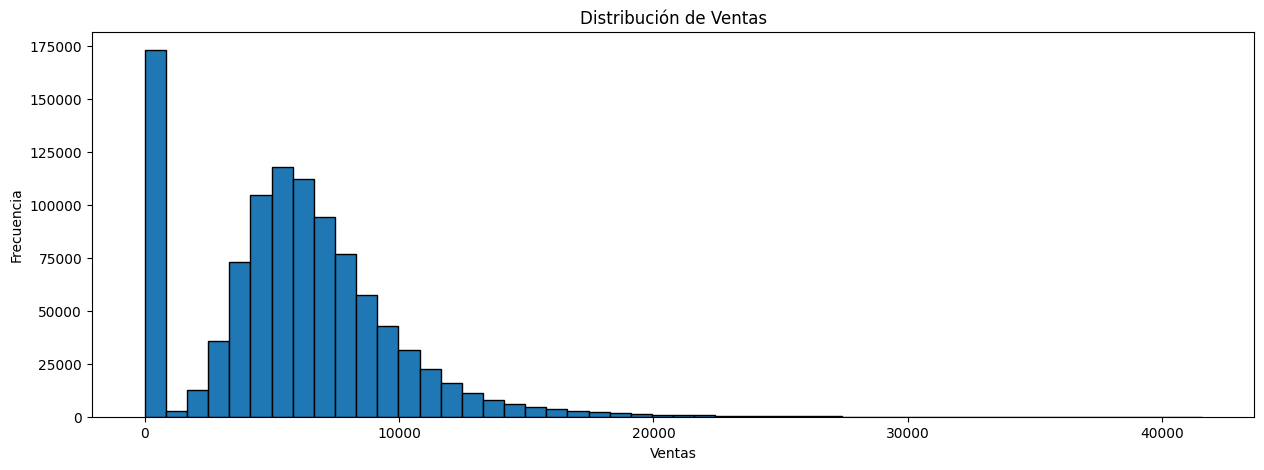

In [ ]:
# Histograma de las ventas
plt.figure(figsize=(15, 5))
plt.hist(train['Sales'], bins=50, edgecolor='black')
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

## 2.5. Análisis Temporal de las Ventas

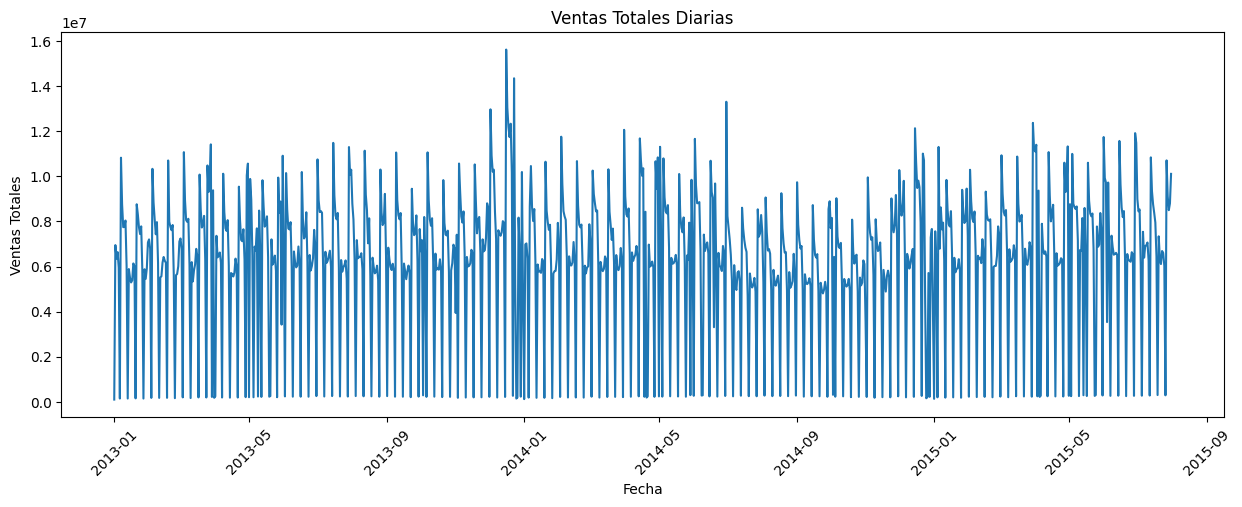

In [ ]:
# Agrupamos las ventas diarias y las sumamos para obtener el total de ventas por día
ventas_diarias = train.groupby('Date')['Sales'].sum()

plt.figure(figsize=(15, 5))
plt.plot(ventas_diarias.index, ventas_diarias.values)
plt.title('Ventas Totales Diarias')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.show()

## 2.6. Análisis de Ventas por Día de la Semana

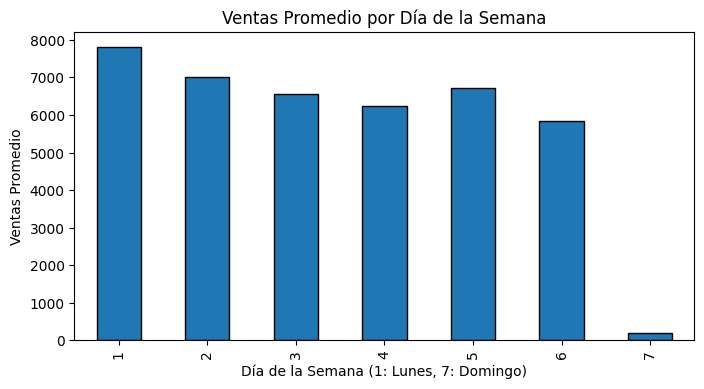

In [ ]:
# Cálculo del promedio de ventas por día de la semana
ventas_por_dia = train.groupby('DayOfWeek')['Sales'].mean()

plt.figure(figsize=(8, 4))
ventas_por_dia.plot(kind='bar', edgecolor='black')
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana (1: Lunes, 7: Domingo)')
plt.ylabel('Ventas Promedio')
plt.show()

## 2.7. Efecto de las Promociones en las Ventas

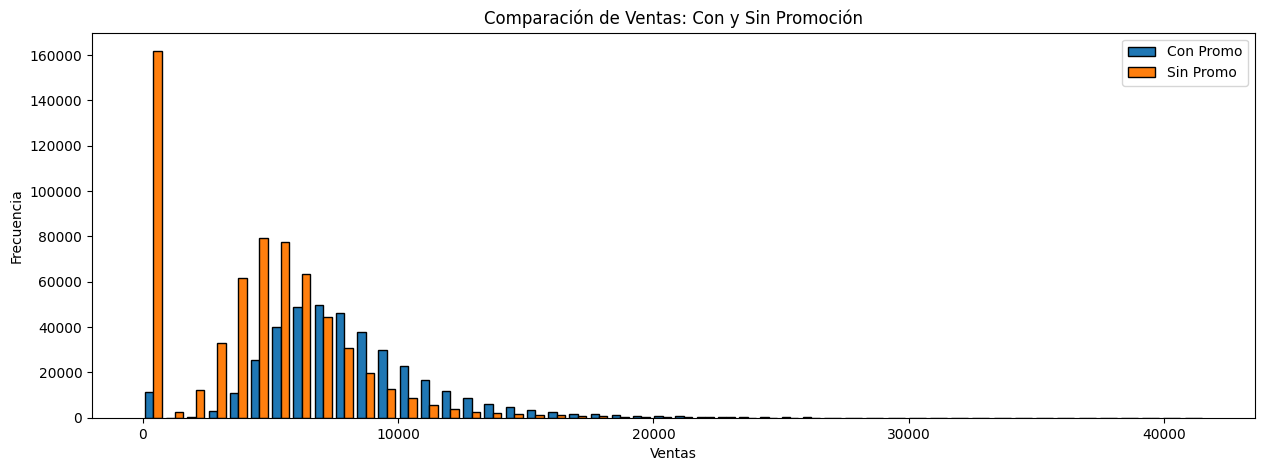

In [ ]:
# Separación de ventas con y sin promoción
ventas_con_promo = train[train['Promo'] == 1]['Sales']
ventas_sin_promo = train[train['Promo'] == 0]['Sales']

plt.figure(figsize=(15, 5))
plt.hist([ventas_con_promo, ventas_sin_promo], bins=50, edgecolor='black', label=['Con Promo', 'Sin Promo'])
plt.title('Comparación de Ventas: Con y Sin Promoción')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## 2.8. Relación entre Clientes y Ventas

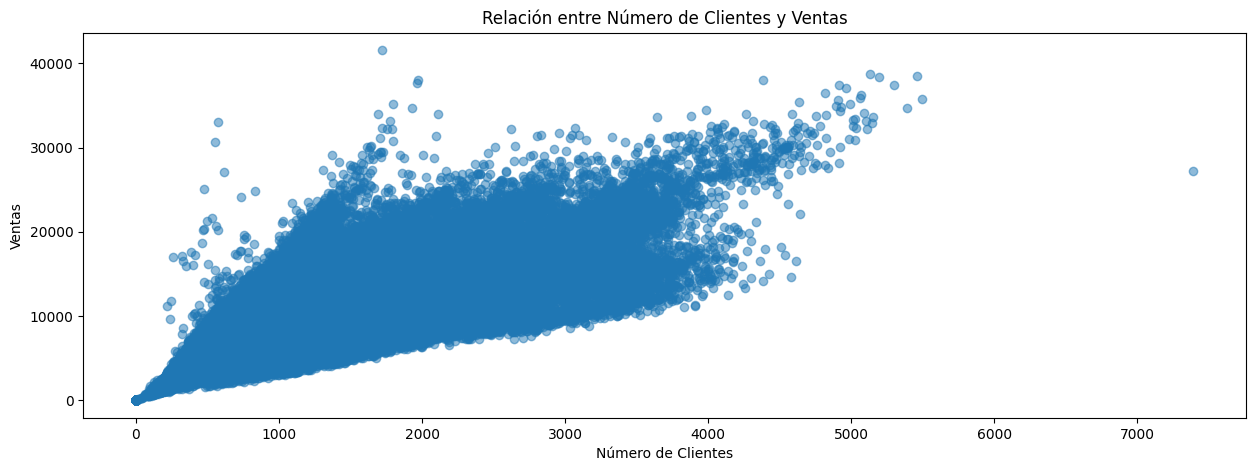

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(train['Customers'], train['Sales'], alpha=0.5)
plt.title('Relación entre Número de Clientes y Ventas')
plt.xlabel('Número de Clientes')
plt.ylabel('Ventas')
plt.show()

## 2.9. Integración de Información de Tiendas

In [ ]:
# Unimos el dataset de entrenamiento con el de tiendas utilizando la columna 'Store'
train_full = pd.merge(train, store, on='Store', how='left')

# Visualizamos las primeras filas del dataset resultante
print("Primeras filas del dataset integrado (train_full):")
display(train_full.head())

Primeras filas del dataset integrado (train_full):


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,None
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,None


In [ ]:
# Revisión de nulos en el DataFrame integrado train_full
print("Nulos en train_full:")
display(train_full.isnull().sum())

# Rellenar los nulos que puedan haber quedado en train_full
train_full.fillna({
    'CompetitionDistance': train_full['CompetitionDistance'].median(),
    'CompetitionOpenSinceMonth': 0,
    'CompetitionOpenSinceYear': 0,
    'Promo2SinceWeek': 0,
    'Promo2SinceYear': 0,
    'PromoInterval': 'None'
}, inplace=True)

Nulos en train_full:


,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


# 3. FEATURE ENGINEERING Y ENCODING

## 3.0. Fusionar la información de 'store' con 'train' y 'test'

In [ ]:
train_full = pd.merge(train, store, on='Store', how='left')
test_full = pd.merge(test, store, on='Store', how='left')

## 3.1. Extracción de Características a partir de la Fecha

In [ ]:
# 3.1. Función para extraer características de fecha
def extract_date_features(df):
    # Extraemos año, mes, día y semana del año a partir de la columna 'Date'
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)
    # Creamos la variable 'IsWeekend': 1 si el día corresponde a sábado o domingo, 0 de lo contrario
    df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)
    return df

# Aplicamos la función a ambos DataFrames
train_full = extract_date_features(train_full)
test_full = extract_date_features(test_full)

## 3.2. Función para agregar características de la competencia

In [ ]:
# 3.2. Función para agregar características de la competencia
def add_competition_features(df):
    # Creamos la fecha de apertura de la competencia utilizando el mes y año (se asume el día 1)
    # Convertimos las columnas a enteros
    df['CompetitionOpenDate'] = pd.to_datetime(
        dict(year=df['CompetitionOpenSinceYear'].astype(int),
             month=df['CompetitionOpenSinceMonth'].astype(int),
             day=1),
        errors='coerce'
    )
    # Calculamos el tiempo (en meses) que la competencia ha estado abierta
    # Usamos la diferencia en días dividida por 30 (aproximación)
    df['CompetitionTimeOpen'] = ((df['Date'] - df['CompetitionOpenDate']).dt.days / 30).apply(lambda x: x if x > 0 else 0)
    return df

# Aplicamos la función a ambos DataFrames
train_full = add_competition_features(train_full)
test_full = add_competition_features(test_full)

## 3.3. Función para agregar características de Promo2

In [ ]:
# 3.3. Función para agregar características de Promo2
def add_promo2_features(df):
    # Se asume que si no participa en Promo2 o los valores son 0, la promoción no ha iniciado.
    # Se crea la fecha de inicio de Promo2 concatenando 'Promo2SinceYear' y 'Promo2SinceWeek'
    # Se formatea de manera que la semana corresponda al lunes de esa semana.
    # Convertimos a enteros y luego a string para la concatenación.
    df['Promo2StartDate'] = pd.to_datetime(
        df['Promo2SinceYear'].astype(int).astype(str) + '-' +
        df['Promo2SinceWeek'].astype(int).astype(str) + '-1',
        format='%Y-%W-%w',
        errors='coerce'
    )
    # Calculamos el tiempo en semanas que lleva activa Promo2 (diferencia en días dividida por 7)
    df['Promo2Time'] = ((df['Date'] - df['Promo2StartDate']).dt.days / 7).apply(lambda x: x if x > 0 else 0)
    return df

# Aplicamos la función a ambos DataFrames
train_full = add_promo2_features(train_full)
test_full = add_promo2_features(test_full)

## 3.4. Encoding de variables categóricas

Las variables categóricas que vamos a transformar son:
- 'StateHoliday': Valores como '0', 'a', 'b', 'c'
- 'StoreType': (e.g., a, b, c, d)
- 'Assortment': (e.g., a, b, c)
- 'PromoInterval': (e.g., "None", "Jan,Apr,Jul,Oct")
Usaremos one-hot encoding para transformar estas columnas en variables dummy.

In [ ]:
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

# Aplicamos get_dummies a train_full
train_full_encoded = pd.get_dummies(train_full, columns=categorical_cols, drop_first=True)

# Hacemos lo mismo con test_full
test_full_encoded = pd.get_dummies(test_full, columns=categorical_cols, drop_first=True)

# Es posible que al codificar se generen diferentes columnas entre train y test.
# Alineamos las columnas de ambos DataFrames para que tengan las mismas variables.
train_full_encoded, test_full_encoded = train_full_encoded.align(test_full_encoded, join='outer', axis=1, fill_value=0)

# Verificamos que la transformación se realizó correctamente
print("Columnas del DataFrame de entrenamiento después del encoding:")
print(train_full_encoded.columns)
print("\nColumnas del DataFrame de test después del encoding:")
print(test_full_encoded.columns)

# Ya tenemos los DataFrames 'train_full_encoded' y 'test_full_encoded' listos para el modelado.

Columnas del DataFrame de entrenamiento después del encoding:
Index(['Assortment_b', 'Assortment_c', 'CompetitionDistance',
       'CompetitionOpenDate', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'CompetitionTimeOpen', 'Customers', 'Date',
       'Day', 'DayOfWeek', 'Id', 'IsWeekend', 'Month', 'Open', 'Promo',
       'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Promo2StartDate',
       'Promo2Time', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_None', 'Sales',
       'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'Store', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'WeekOfYear', 'Year'],
      dtype='object')

Columnas del DataFrame de test después del encoding:
Index(['Assortment_b', 'Assortment_c', 'CompetitionDistance',
       'CompetitionOpenDate', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'CompetitionTimeOpen', 'Customers', 'Date',
   

# 4. Selección y Entrenamiento de Modelos

## 4.1. Selección de Variables y División de los Datos

In [ ]:
# Lista de columnas a excluir (por ejemplo, la variable target, identificadores, fechas y variables derivadas que no se usan directamente)
exclude_cols = ['Sales', 'Customers', 'Date', 'CompetitionOpenDate', 'Promo2StartDate']

# Seleccionamos las columnas de train_full_encoded que usaremos para el modelado
features_columns = [col for col in train_full_encoded.columns if col not in exclude_cols]
target = 'Sales'

# Definimos X (features) e y (target)
X_model = train_full_encoded[features_columns]
y_model = train_full_encoded[target]

# Dividimos los datos en conjunto de entrenamiento y validación (80%/20%)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# Comprobamos que no haya valores nulos en X_train (todo debe ser numérico después del encoding)
print("Nulos en X_train:")
display(X_train.isnull().sum())

Nulos en X_train:


,0
Assortment_b,0
Assortment_c,0
CompetitionDistance,0
CompetitionOpenSinceMonth,0
CompetitionOpenSinceYear,0
CompetitionTimeOpen,0
Day,0
DayOfWeek,0
Id,0
IsWeekend,0


## 4.2. Evaluar Modelos Individuales

Evaluar Modelo 1: Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression

# Entrenamiento y predicción con Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)
rmspe_lr = rmspe(y_val, lr_pred)
print("RMSPE - Regresión Lineal: {:.4f}".format(rmspe_lr))

RMSPE - Regresión Lineal: 0.5278


Evaluar Modelo 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entrenamiento y predicción con Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rmspe_rf = rmspe(y_val, rf_pred)
print("RMSPE - Random Forest: {:.4f}".format(rmspe_rf))

RMSPE - Random Forest: 0.2386


Evaluar Modelo 3: Gradient Boosting (sklearn)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Entrenamiento y predicción con Gradient Boosting (sklearn)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_val)
rmspe_gbr = rmspe(y_val, gbr_pred)
print("RMSPE - Gradient Boosting (sklearn): {:.4f}".format(rmspe_gbr))

RMSPE - Gradient Boosting (sklearn): 0.4871


Evaluar Modelo 4: XGBoost

In [ ]:
import xgboost as xgb

# Entrenamiento y predicción con XGBoost
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
xgbr.fit(X_train, y_train)
xgb_pred = xgbr.predict(X_val)
rmspe_xgb = rmspe(y_val, xgb_pred)
print("RMSPE - XGBoost: {:.4f}".format(rmspe_xgb))

RMSPE - XGBoost: 0.3932


Evaluar Modelo 5: LightGBM

In [ ]:
# Le tuve que meter toda esta primera parte porque encontraba caracteres especiales xd validen si está bien, me dio pereza revisar

# Función para limpiar los nombres de las columnas
def clean_column_names(df):
    df.columns = [col.replace(',', '_').replace(' ', '_') for col in df.columns]
    return df

# Después de aplicar get_dummies y alinear los DataFrames, limpia los nombres:
train_full_encoded = pd.get_dummies(train_full, columns=categorical_cols, drop_first=True)
test_full_encoded = pd.get_dummies(test_full, columns=categorical_cols, drop_first=True)

# Alineamos ambos DataFrames para que tengan las mismas columnas
train_full_encoded, test_full_encoded = train_full_encoded.align(test_full_encoded, join='outer', axis=1, fill_value=0)

# Limpiamos los nombres de las columnas
train_full_encoded = clean_column_names(train_full_encoded)
test_full_encoded = clean_column_names(test_full_encoded)

# Ahora procedemos a la división para el modelado
# Excluimos columnas que no usaremos para la predicción (por ejemplo, target, fechas, etc.)
exclude_cols = ['Sales', 'Customers', 'Date', 'CompetitionOpenDate', 'Promo2StartDate']
features_columns = [col for col in train_full_encoded.columns if col not in exclude_cols]
target = 'Sales'

X_model = train_full_encoded[features_columns]
y_model = train_full_encoded[target]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

# Entrenamiento con LightGBM utilizando callbacks para early stopping
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_val, label=y_val, reference=lgb_train)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=[lgb_train, lgb_val],
    callbacks=[lgb.early_stopping(stopping_rounds=50), lgb.log_evaluation(100)]
)

lgb_pred = lgb_model.predict(X_val, num_iteration=lgb_model.best_iteration)
rmspe_lgb = rmspe(y_val, lgb_pred)
print("RMSPE - LightGBM: {:.4f}".format(rmspe_lgb))

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 1901.66	valid_1's rmse: 1900.94
[200]	training's rmse: 1630.11	valid_1's rmse: 1632.56
[300]	training's rmse: 1464.99	valid_1's rmse: 1470.13
[400]	training's rmse: 1334.24	valid_1's rmse: 1341.82
[500]	training's rmse: 1243.85	valid_1's rmse: 1253.71
[600]	training's rmse: 1176.55	valid_1's rmse: 1187.97
[700]	training's rmse: 1113.31	valid_1's rmse: 1125.83
[800]	training's rmse: 1059.96	valid_1's rmse: 1075.21
[900]	training's rmse: 1019.74	valid_1's rmse: 1036.67
[1000]	training's rmse: 986.068	valid_1's rmse: 1004.16
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 986.068	valid_1's rmse: 1004.16
RMSPE - LightGBM: 0.2829


## 4.3. Comparación de los Modelos

In [ ]:
import pandas as pd

# Diccionario para almacenar los resultados
resultados = {
    "Regresión Lineal": rmspe_lr,
    "Random Forest": rmspe_rf,
    "Gradient Boosting (sklearn)": rmspe_gbr,
    "XGBoost": rmspe_xgb,
    "LightGBM": rmspe_lgb
}

# Convertir el diccionario en un DataFrame y ordenar según el RMSPE (de menor a mayor)
resultados_df = pd.DataFrame(list(resultados.items()), columns=["Modelo", "RMSPE"])
resultados_df.sort_values(by="RMSPE", inplace=True)
print("Comparación de Modelos (RMSPE):")
display(resultados_df)

Comparación de Modelos (RMSPE):


,Modelo,RMSPE
1,Random Forest,0.238560
4,LightGBM,0.282946
3,XGBoost,0.393183
2,Gradient Boosting (sklearn),0.487084
0,Regresión Lineal,0.527834
